# Anomaly detection using pyOD

### Install pyOD

In [1]:
!pip install pyod
!pip install pandas numpy matplotlib scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.2-py3-none-any.whl size=190289 sha256=ab23f6444c52ec626d11f471e056aafd45d34028fe796d76f1b877c01303ceb0
  Stored in directory: /root/.cache/pip/wheels/81/1b/61/aa85b78c3c0c8871f4231e3f4a03bb23cecb7db829498380ee
Successfully built pyod


In [2]:
import numpy as np
import pandas as pd
from pyod.models.knn import KNN   # import KNN model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Load and prepare the dataset
# We will use a simple dataset for this example
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=300, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, flip_y=0,
                           random_state=4)


In [3]:
# Add outliers
outliers_fraction = 0.1
n_outliers = int(outliers_fraction * len(X))
X_outliers = np.random.uniform(low=-4, high=4, size=(n_outliers, 2))
X = np.vstack([X, X_outliers])
y_outliers = np.array([1] * n_outliers)
y = np.concatenate([y, y_outliers])


### Modeling and training data

In [4]:
# Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [5]:
# Train the KNN model
clf = KNN()
clf.fit(X_train)

# Predict test data
y_test_pred = clf.predict(X_test)


In [6]:
# Evaluation
print(f"Classification Report:\n{classification_report(y_test, y_test_pred)}")


Classification Report:
              precision    recall  f1-score   support

           0       0.45      1.00      0.62        27
           1       1.00      0.15      0.27        39

    accuracy                           0.50        66
   macro avg       0.72      0.58      0.44        66
weighted avg       0.78      0.50      0.41        66



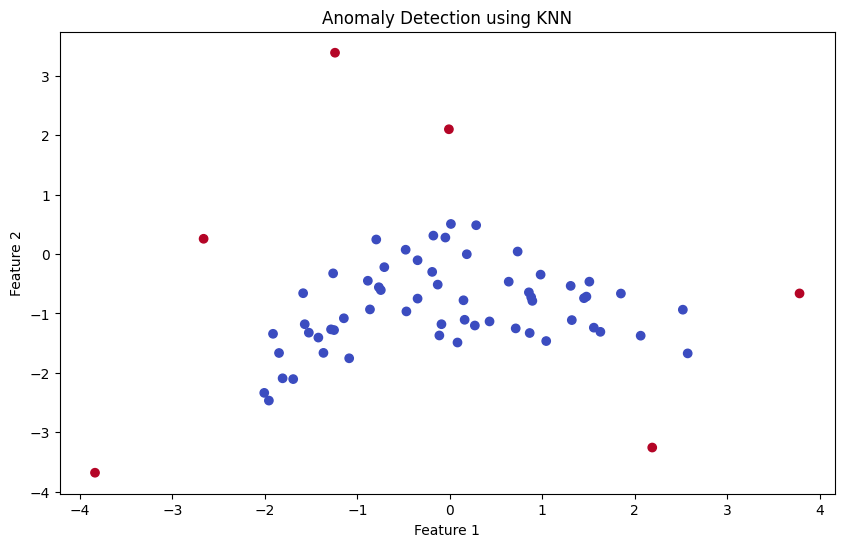

In [7]:
# Visualizing the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred, cmap='coolwarm')
plt.title("Anomaly Detection using KNN")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()